In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-work


In [3]:
import sys
import numpy as np
import skimage
import cv2
import sklearn

In [22]:
import time

In [4]:
from holoviews import *

AttributeError: _attrib_name

In [5]:
%load_ext holoviews.ipython

AttributeError: _attrib_name

In [6]:
import neukrill_net.utils
import neukrill_net.highlevelfeatures

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
settings = neukrill_net.utils.Settings('settings.json')

In [9]:
X,y = settings.flattened_train_paths(settings.classes)

In [10]:
img = neukrill_net.highlevelfeatures.loadimage(X[0])

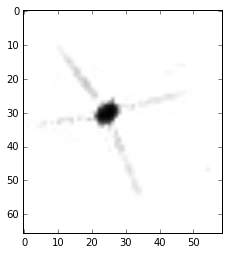

In [11]:
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

In [12]:
import skimage.feature

In [13]:
M = skimage.feature.greycomatrix(img, [1], 0, levels=256, normed=True)

In [14]:
M.shape

(256, 256, 1, 1)

In [15]:
M.squeeze()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.0015674 ,
         0.0031348 ,  0.01593521],
       [ 0.        ,  0.        ,  0.        , ...,  0.00365726,
         0.01593521,  0.03605016],
       [ 0.        ,  0.        ,  0.        , ...,  0.01410658,
         0.03761755,  0.76985371]])

In [16]:
%%opts Image style(cmap='coolwarm')
Image((M.squeeze()-M.min())*(M.max()-M.min()))

ERROR: Cell magic `%%opts` not found.


In [17]:
reload(neukrill_net.highlevelfeatures)

<module 'neukrill_net.highlevelfeatures' from '/afs/inf.ed.ac.uk/user/s11/s1145806/Documents/git/neukrill-net-tools/neukrill_net/highlevelfeatures.pyc'>

In [18]:
hlf = neukrill_net.highlevelfeatures.CoocurProps()

In [19]:
hlf.extract_image(img)

array([[  8.94109831e+01,   2.33748865e+02,   3.84509414e+02,
          5.26368752e+02,   6.42020154e+02,   7.26356382e+02,
          7.71580354e+02,   7.91133169e+02,   8.07771936e+02,
          8.25750940e+02,   8.46006732e+02,   8.65581185e+02,
          8.88185145e+02,   9.09241280e+02,   9.31630503e+02,
          9.53560952e+02,   9.74185997e+02,   9.96331812e+02],
       [  1.83858521e+00,   2.99505974e+00,   3.94732815e+00,
          4.73317533e+00,   5.33734531e+00,   5.78863418e+00,
          6.07474006e+00,   6.24732499e+00,   6.38570297e+00,
          6.52894236e+00,   6.67213181e+00,   6.79616729e+00,
          6.94389156e+00,   7.07420303e+00,   7.20536685e+00,
          7.29957729e+00,   7.40371459e+00,   7.52496845e+00],
       [  8.40084695e-01,   8.26183165e-01,   8.15821243e-01,
          8.02941013e-01,   7.95434761e-01,   7.88870645e-01,
          7.82232097e-01,   7.75070516e-01,   7.71926731e-01,
          7.65476700e-01,   7.62281847e-01,   7.59127917e-01,
      

In [20]:
neukrill_net.highlevelfeatures.CoocurProps(num_angles=8).extract_image(img)

array([[  1.17428038e+02,   1.89596979e+02,   3.71757996e+02,
          5.42268418e+02,   6.73977672e+02,   7.16145786e+02,
          7.80393091e+02,   8.12691427e+02,   8.21010811e+02,
          8.47480913e+02,   8.76248802e+02,   8.86036029e+02,
          9.17234941e+02,   9.49361347e+02,   9.81212789e+02,
          9.92178014e+02,   1.02502690e+03,   1.06022794e+03],
       [  2.08998226e+00,   2.66821952e+00,   3.84167395e+00,
          4.80607179e+00,   5.53040286e+00,   5.75604730e+00,
          6.13952547e+00,   6.40731029e+00,   6.47649928e+00,
          6.69422998e+00,   6.92582249e+00,   6.98784024e+00,
          7.20834929e+00,   7.43979831e+00,   7.64416070e+00,
          7.69126592e+00,   7.88339788e+00,   8.09769751e+00],
       [  8.37396275e-01,   8.30445509e-01,   8.14798875e-01,
          8.00121406e-01,   7.90376200e-01,   7.87094142e-01,
          7.78041077e-01,   7.68082550e-01,   7.66510658e-01,
          7.57246223e-01,   7.49762983e-01,   7.48186018e-01,
      

In [23]:
t0 = time.time()
XF = hlf.transform(X)
print("Computing features took {}".format(time.time()-t0))

Computing features took 12835.581182


In [25]:
sklearn.externals.joblib.dump((hlf,XF,y),'cache/coocurprops.pkl')

['cache/coocurprops.pkl', 'cache/coocurprops.pkl_01.npy']

In [26]:
XF.shape

(1, 30336, 108)

## Naive Bayes

In [27]:
import sklearn.naive_bayes

In [28]:
clf = sklearn.naive_bayes.GaussianNB()

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    sklearn.preprocessing.StandardScaler().fit_transform(XF.squeeze(0)), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Time=0.773290872574
Accuracy=0.20266350211
Logloss=22.9722176476


## Logistic Regression

In [29]:
clf = sklearn.linear_model.LogisticRegression(random_state=42)

t0 = time.time()
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(
    sklearn.preprocessing.StandardScaler().fit_transform(XF.squeeze(0)), y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)

t1 = time.time()
total = t1-t0
print("Time={}".format(total))

print("Accuracy={}".format(clf.score(X_test, y_test)))
print("Logloss={}".format(sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))))

Time=105.316153049
Accuracy=0.444290611814
Logloss=2.2076145382
